# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Label.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

####**Note: Please use GPU runtime to execute the code efficiently**

## Importing necessary libraries

In [ ]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend
from keras.callbacks import ReduceLROnPlateau
import random
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [ ]:
# Mount Google drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the image file of dataset
images0 = np.load('/content/drive/MyDrive/UT AI/My Projects/Project 5: Plants Seedling Classification/images.npy')      # Complete the code to read the dataset

# Load the labels file of dataset
labels = pd.read_csv('/content/drive/MyDrive/UT AI/My Projects/Project 5: Plants Seedling Classification/Labels.csv')  # Complete the code to read the dataset

In [ ]:
images = images0.copy()

## Data Overview

### Understand the shape of the dataset

In [ ]:
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


Here the data is stored in a **4-dimensional NumPy array**. The first dimension **4750** is denoting **the number of images and labels in the data**, and each image is stacked on top of the other as a 3-dimensional NumPy array. The second dimension **128** is denoting **the number of pixels along the x-axis**, **the third dimension 128 is denoting the number of pixels along the y-axis** and **the fourth dimension 3 is the total number of channels in those images** i.e. these are colored images consisting of RGB (Red, Green, and Blue) channels.

**CONCLUSION:** There are 4750 RGB  images of shape 128 x 128 X 3, each image having 3 channels.

Below is a 3-dimensional NumPy representation of the first image in the training data. **Each pixel in an image has 3 values - the intensity of R, G, and B channels**, and the size of each image is 128x128. So, each image is represented by 128 arrays of shape 128x3.

In [ ]:
images[0]

array([[[ 35,  52,  78],
        [ 36,  49,  76],
        [ 31,  45,  69],
        ...,
        [ 78,  95, 114],
        [ 76,  93, 110],
        [ 80,  95, 109]],

       [[ 33,  46,  68],
        [ 37,  50,  73],
        [ 48,  65,  83],
        ...,
        [ 81,  96, 113],
        [ 74,  89, 105],
        [ 83,  95, 109]],

       [[ 34,  50,  68],
        [ 35,  52,  72],
        [ 70,  85, 101],
        ...,
        [ 83,  97, 112],
        [ 79,  94, 108],
        [ 79,  94, 107]],

       ...,

       [[ 35,  50,  69],
        [ 42,  57,  73],
        [ 42,  57,  72],
        ...,
        [ 60,  76,  92],
        [ 67,  81,  97],
        [ 64,  77,  95]],

       [[ 36,  52,  67],
        [ 48,  63,  78],
        [ 41,  57,  73],
        ...,
        [ 44,  66,  83],
        [ 58,  76,  91],
        [ 57,  74,  90]],

       [[ 44,  58,  70],
        [ 43,  57,  73],
        [ 40,  55,  72],
        ...,
        [ 41,  70,  92],
        [ 55,  78,  97],
        [ 61,  79,  96]]

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)

### Plotting random images from each of the class

In [ ]:
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

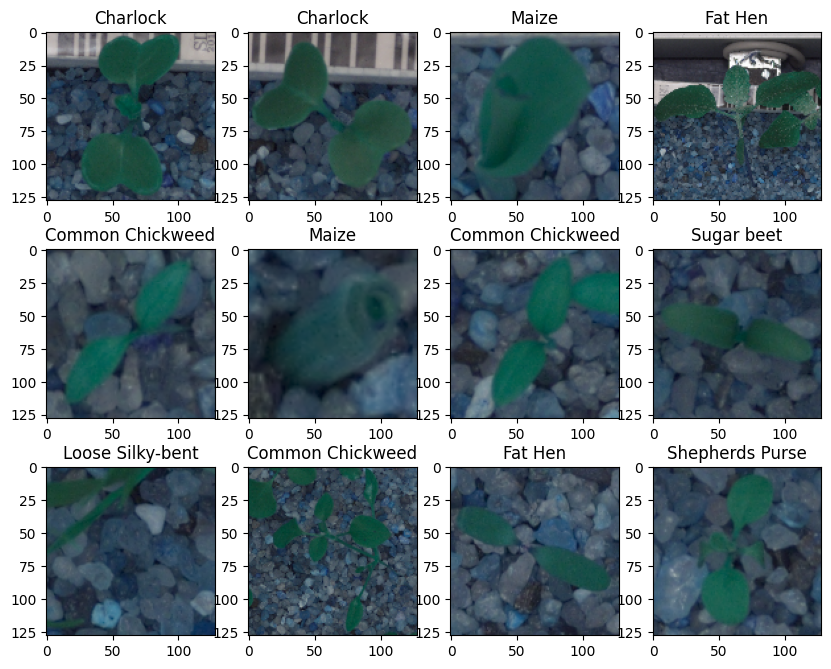

In [ ]:
plot_images(images,labels)

### Checking the distribution of the target variable

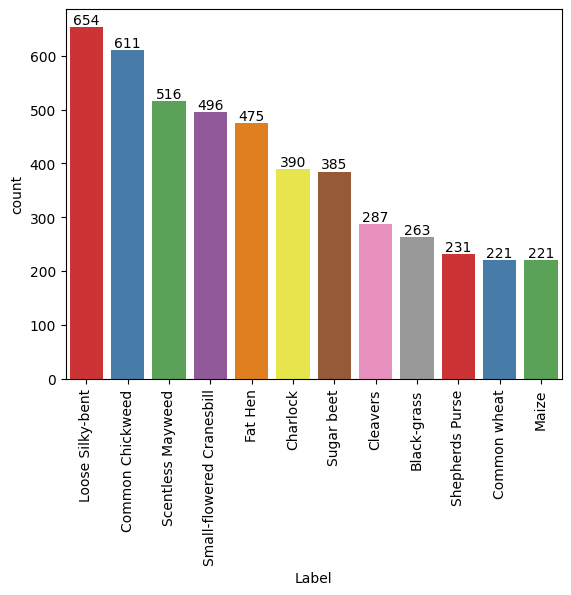

In [ ]:
ax = sns.countplot(x=labels['Label'], palette = "Set1", order=labels['Label'].value_counts().index)
plt.xticks(rotation='vertical');
for label in ax.containers:
    ax.bar_label(label)
plt.show()

- There are between 221 and 654 images in each category.
- The dataset appears to be quite imbalanced. In fact, the number of
images of the Loose Silky-bent (654) is almost three time more than the number
of images of the Maize (221).


## Data Pre-Processing

### Convert the BGR images to RGB images.

In [ ]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

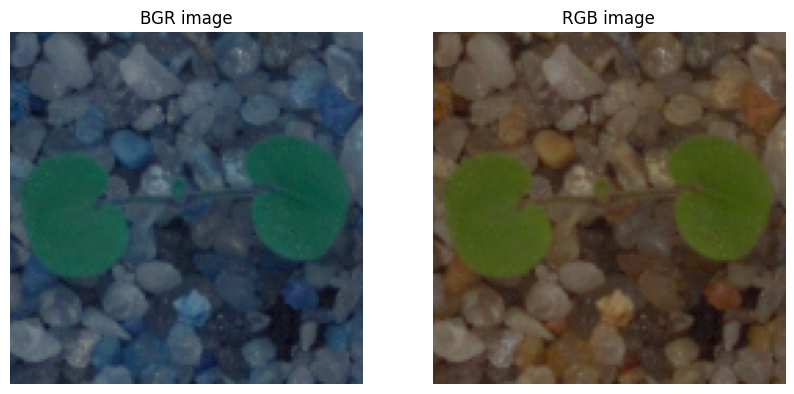

In [ ]:
# create figure
fig = plt.figure(figsize=(10, 7))

rows = 1
columns = 2

i=1;

for j in [[images0[0],"BGR image"], [images[0],"RGB image"]]:

  # Adds a subplot at the 1st position
  fig.add_subplot(rows, columns, i)

  # showing image
  plt.imshow(j[0])
  plt.axis('off')
  plt.title(j[1])

  i=i+1

### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [ ]:
images_decreased=[]
height = 64
width =  64
dimensions = (width, height)
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

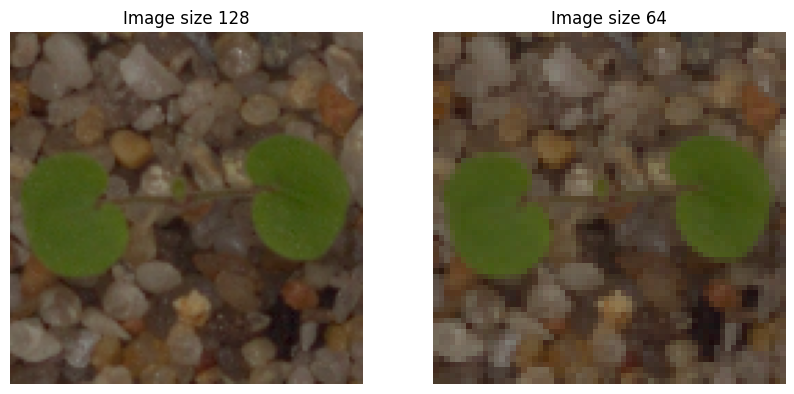

In [ ]:
# create figure
fig = plt.figure(figsize=(10, 7))

rows = 1
columns = 2

i=1;

for j in [[images[0],"Image size 128"], [images_decreased[0],"Image size 64"]]:

  # Adds a subplot at the 1st position
  fig.add_subplot(rows, columns, i)

  # showing image
  plt.imshow(j[0])
  plt.axis('off')
  plt.title(j[1])

  i=i+1

### Data Preparation for Modeling

Before we proceed to build a model, we need to split the data into train, test, and validation to be able to evaluate the model that we build on the train data.

Since we have only 4750 images, we will use 10% of our data for testing, 10% of our data for validation and 80% of our data for training.


### Split the dataset

In [ ]:
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased), labels, test_size=0.1, random_state=42,stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1, random_state=42,stratify=y_temp)

In [ ]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(3847, 64, 64, 3) (3847, 1)
(428, 64, 64, 3) (428, 1)
(475, 64, 64, 3) (475, 1)


### Encode the target labels

We now encode categorical features and scale the pixel values.


In [ ]:
# Convert labels from names to one hot vectors.
# We have already used encoding methods like onehotencoder and labelencoder earlier so now we will be using a new encoding method called labelBinarizer.
# Labelbinarizer works similar to onehotencoder

enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

In [ ]:
y_train_encoded.shape, y_val_encoded.shape, y_test_encoded.shape

((3847, 12), (428, 12), (475, 12))

#### Check Data

In [ ]:
y_train_encoded[0], y_train_encoded[1], y_train_encoded[2]

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]))

In [ ]:
y_val_encoded[0], y_val_encoded[1], y_val_encoded[2]

(array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]),
 array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [ ]:
y_test_encoded[0], y_test_encoded[1], y_test_encoded[2]

(array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]))

### Data Normalization

Since the **image pixel values range from 0-255**, our method of normalization here will be **scaling** - we shall **divide all the pixel values by 255 to standardize the images to have values between 0-1.**

In [ ]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

## Model Building - Convolutional Neural Network (CNN)

Here we build a model using the train data and then check its performance.

Let's create a CNN model sequentially, where we will be adding the layers one after another.

First, we need to clear the previous model's history from the session even if a single model can run multiple times on the same data.

In Keras, we need a special command to clear the model's history, otherwise the previous model history remains in the backend.

Also, let's fix the seed again after clearing the backend.

Let's **set the seed for random number generators in Numpy, the Random library in Python, and in TensorFlow** to be able to reproduce the same results every time we run the code.

In [ ]:
# Clearing backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Intializing a sequential model
model1 = Sequential()

# Adding first conv layer with 128 filters, kernel size 3x3, and ReLU activation function.
# Padding 'same' provides the output size same as the input size.
# Input_shape denotes input image dimension of images
model1.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model1.add(MaxPooling2D((2, 2), padding = 'same'))

# Adding two similar convolution layers with 64 and 32 filters, respectively, and max-pooling layers
# In both cases we use ReLU activation function and padding 'same'.
model1.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))

model1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))

# Flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model1.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model1.add(Dense(16, activation='relu'))
model1.add(Dropout(0.3))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model1.add(Dense(12, activation='softmax'))


# Using Adam Optimizer
opt=Adam()
# Compile the model using categorical crossentropy for loss fucntion
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 32)          0

### **Fitting the model on the train data**

In [ ]:
# Fit the model on train and also using the validation data for validation
history_1 = model1.fit(
            X_train_normalized, y_train_encoded,
            epochs=30,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2
)

Epoch 1/30
121/121 - 95s - loss: 0.9390 - accuracy: 0.6436 - val_loss: 0.9962 - val_accuracy: 0.7173 - 95s/epoch - 785ms/step
Epoch 2/30
121/121 - 73s - loss: 0.9392 - accuracy: 0.6483 - val_loss: 1.0409 - val_accuracy: 0.7103 - 73s/epoch - 605ms/step
Epoch 3/30
121/121 - 75s - loss: 0.9205 - accuracy: 0.6447 - val_loss: 1.0482 - val_accuracy: 0.7033 - 75s/epoch - 619ms/step
Epoch 4/30
121/121 - 79s - loss: 0.9172 - accuracy: 0.6405 - val_loss: 1.0676 - val_accuracy: 0.7126 - 79s/epoch - 656ms/step
Epoch 5/30
121/121 - 75s - loss: 0.9329 - accuracy: 0.6382 - val_loss: 1.1588 - val_accuracy: 0.7009 - 75s/epoch - 621ms/step
Epoch 6/30
121/121 - 72s - loss: 0.9107 - accuracy: 0.6441 - val_loss: 1.0492 - val_accuracy: 0.7150 - 72s/epoch - 598ms/step
Epoch 7/30
121/121 - 73s - loss: 0.8909 - accuracy: 0.6595 - val_loss: 1.0772 - val_accuracy: 0.7290 - 73s/epoch - 602ms/step
Epoch 8/30
121/121 - 73s - loss: 0.9018 - accuracy: 0.6530 - val_loss: 1.0367 - val_accuracy: 0.7196 - 73s/epoch - 606

### **Model Evaluation**

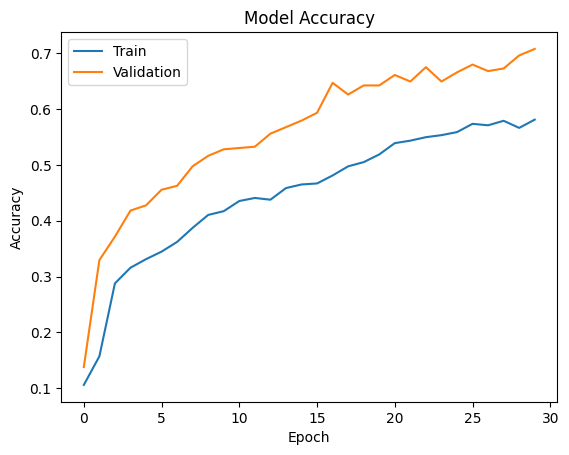

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**CONCLUSION:**


*   We can see from the above plot that **the training accuracy (0.7079) of the  model was good but the validation accuracy (0.5812) was not good.**
*   The model seems to overfit on the data.


### **Evaluating the model on test data**

In [ ]:
accuracy = model1.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 0.9929 - accuracy: 0.6821 - 397ms/epoch - 26ms/step


### **Generating the predictions using test data**

In [ ]:
# Here we would get the output as probablities for each category
y_pred=model1.predict(X_test_normalized)

15/15 [==============================] - 0s 4ms/step


In [ ]:
y_pred

array([[1.4842212e-21, 3.3252394e-11, 5.3147394e-19, ..., 1.8004078e-02,
        1.5757855e-14, 1.6476720e-06],
       [5.7419325e-10, 3.1522778e-01, 1.6559434e-01, ..., 5.9791498e-02,
        4.0512463e-01, 3.9039444e-02],
       [1.5069050e-10, 9.2693500e-02, 5.2175518e-02, ..., 2.9680131e-02,
        7.5692302e-01, 3.1089161e-02],
       ...,
       [2.3775348e-01, 8.6401393e-08, 1.0437256e-03, ..., 7.2654089e-08,
        4.8963487e-09, 5.4821717e-03],
       [8.8195486e-11, 3.2221267e-03, 1.9451312e-05, ..., 8.0761507e-02,
        5.6290298e-07, 2.7379934e-02],
       [3.5449733e-11, 2.5761815e-02, 4.8872590e-04, ..., 3.4635854e-01,
        1.9580168e-03, 2.3527168e-01]], dtype=float32)

### **Plotting the Confusion Matrix**

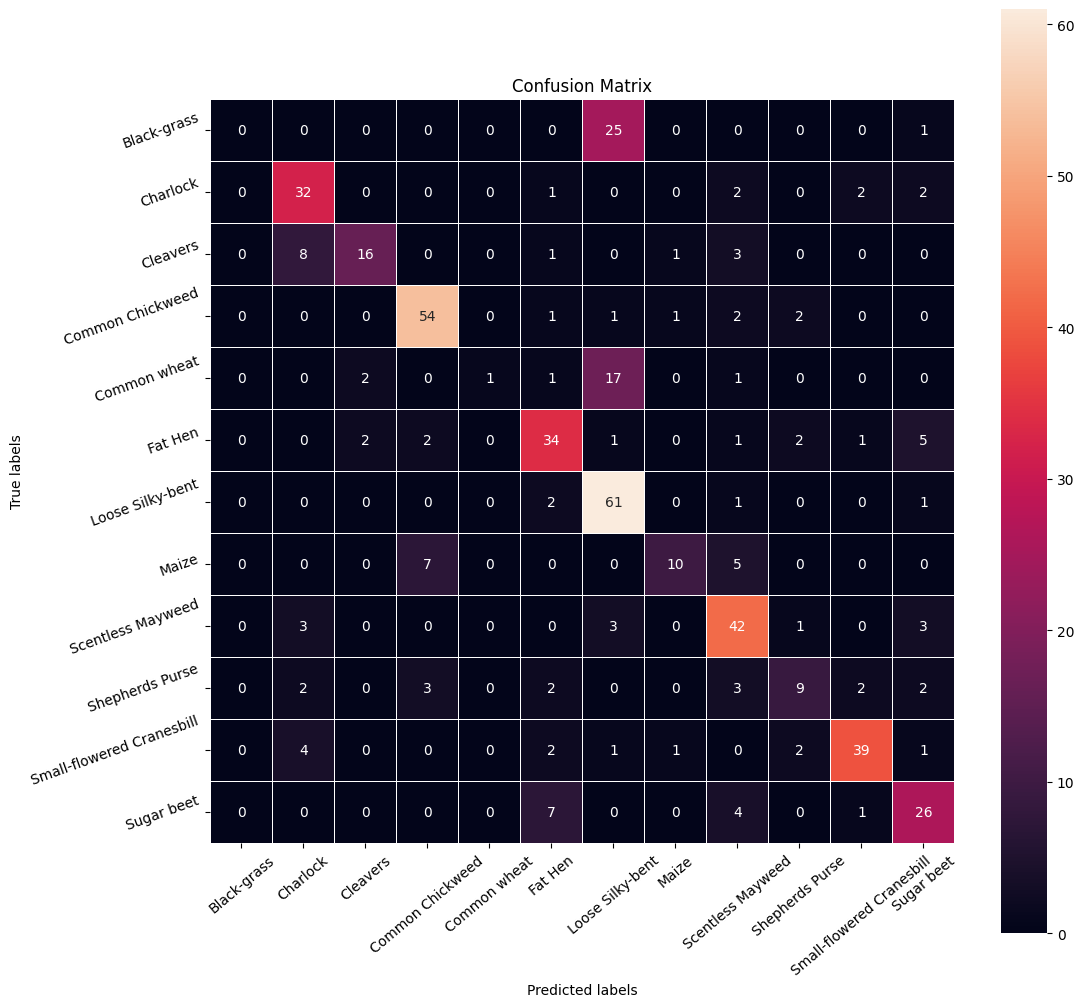

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

**Plotting Classification Report**

In [ ]:
# Plotting the classification report
cr1=classification_report(y_test_arg,y_pred_arg)
print(cr1)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.65      0.82      0.73        39
           2       0.80      0.55      0.65        29
           3       0.82      0.89      0.85        61
           4       1.00      0.05      0.09        22
           5       0.67      0.71      0.69        48
           6       0.56      0.94      0.70        65
           7       0.77      0.45      0.57        22
           8       0.66      0.81      0.72        52
           9       0.56      0.39      0.46        23
          10       0.87      0.78      0.82        50
          11       0.63      0.68      0.66        38

    accuracy                           0.68       475
   macro avg       0.67      0.59      0.58       475
weighted avg       0.67      0.68      0.65       475



<b>CONCLUSIONS:</b><br>

- We observe that many of the classes are not predicted correctly.
- In comparison to the rest, we can see that classes 3 and 10 are well classified.
- Class 1 (Charlock) has a good recall, but a relatively low precision.
- Class 6 (Loose Silky-bent) has a very good recall, but a low precision.
- Class 8 (Scentless Mayweed) has a good recall, but a low precision.
- We can also observe that classes 0 and 9 are mostly misclassified.
- Class 4 (Common wheat) has a perfect precision, but a very low recall and f1-score.

## Model Performance Improvement

**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

In [ ]:
# Monitor val_accuracy
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

### **Data Augmentation**


In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Set the rotation_range to 20
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest'
                              )

In [ ]:
# Intializing a sequential model
model2 = Sequential()

# Adding the first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension images
model2.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model2.add(MaxPooling2D((2, 2), padding = 'same'))

# Adding the second conv layer with 32 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
model2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))

# Adding max pooling to reduce the size of output of first conv layer
model2.add(MaxPooling2D((2, 2), padding = 'same'))
model2.add(BatchNormalization())

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model2.add(Flatten())

# Adding a fully connected dense layer with 16 neurons
model2.add(Dense(16, activation='relu'))

#Adding a dropout layer with dropout_rate=0.3
model2.add(Dropout(0.3))
#Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model2.add(Dense(12, activation='softmax'))

# Initialize Adam Optimimzer
opt=Adam()
# Compile model
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 32)        128       
 chNormalization)                                                
                                                      

#### <b> Fitting the model on the train data

In [ ]:
# Fit the model on train data with batch_size=64 and epochs=30
# Epochs
epochs = 30
# Batch size
batch_size = 64

history = model2.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       shuffle=False),
                                       epochs=epochs,
                                       steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                                       validation_data=(X_val_normalized,y_val_encoded),
                                       verbose=1,callbacks=[learning_rate_reduction])

Epoch 1/30
60/60 [==============================] - 7s 82ms/step - loss: 2.3390 - accuracy: 0.1686 - val_loss: 2.4252 - val_accuracy: 0.1706 - lr: 0.0010
Epoch 2/30
60/60 [==============================] - 5s 75ms/step - loss: 1.9176 - accuracy: 0.3603 - val_loss: 2.3642 - val_accuracy: 0.1402 - lr: 0.0010
Epoch 3/30
60/60 [==============================] - 4s 74ms/step - loss: 1.5956 - accuracy: 0.4671 - val_loss: 2.2243 - val_accuracy: 0.2827 - lr: 0.0010
Epoch 4/30
60/60 [==============================] - 6s 100ms/step - loss: 1.4817 - accuracy: 0.4885 - val_loss: 2.1531 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 5/30
60/60 [==============================] - 6s 97ms/step - loss: 1.3751 - accuracy: 0.5340 - val_loss: 2.0917 - val_accuracy: 0.3411 - lr: 0.0010
Epoch 6/30
60/60 [==============================] - 5s 77ms/step - loss: 1.3302 - accuracy: 0.5440 - val_loss: 1.6830 - val_accuracy: 0.4416 - lr: 0.0010
Epoch 7/30
60/60 [==============================] - 5s 77ms/step - loss: 1.

#### **Model Evaluation**

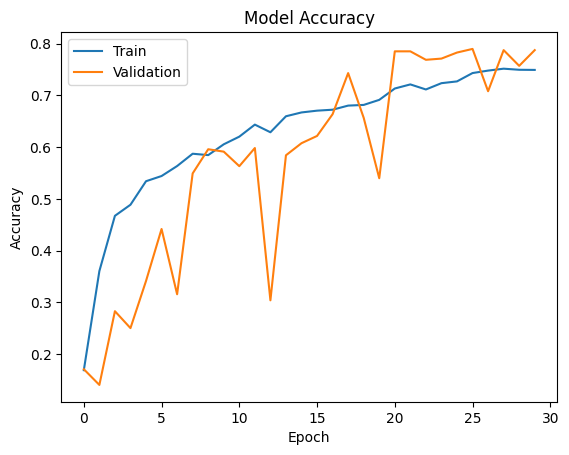

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**CONCLUSION:**

* We can observe that our accuracy (training and validation) has improved compared to our previous model. In fact, in model 1, the training accuracy
was 0.7079 and the validation accuracy was 0.5812. Now it is 0.7491 and 0.7874, respectively.

*   The new model doesn't seem to overfit any more.

#### **Evaluating the model on test data**

In [ ]:
accuracy = model2.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 0.6872 - accuracy: 0.7811 - 117ms/epoch - 8ms/step


**CONCLUSION:** We can observe that the accuracy of our new model (0.7811) has improved compared to our previous model (0.6821).

#### **Generating the predictions using test data**

In [ ]:
# Here we would get the output as probablities for each category
y_pred=model2.predict(X_test_normalized)

15/15 [==============================] - 0s 3ms/step


In [ ]:
y_pred

array([[1.2420276e-10, 2.3757502e-12, 2.4355062e-12, ..., 4.6837871e-05,
        1.3416988e-08, 9.0297726e-06],
       [1.0565161e-12, 3.5806466e-03, 2.0507902e-04, ..., 2.3839252e-02,
        9.7236419e-01, 5.2678265e-06],
       [1.1801065e-09, 1.1343803e-05, 5.8477349e-07, ..., 2.1952456e-02,
        9.7775578e-01, 2.8067905e-07],
       ...,
       [3.6163455e-01, 3.3339559e-10, 9.3628187e-05, ..., 6.9548733e-08,
        2.0318403e-07, 8.0820564e-06],
       [1.2990685e-05, 6.7538634e-04, 5.3719799e-03, ..., 9.0865396e-02,
        4.8089749e-04, 8.3253412e-03],
       [1.2442628e-05, 5.8045492e-02, 6.8992446e-03, ..., 2.7045894e-01,
        6.5902907e-01, 3.5480908e-03]], dtype=float32)

#### **Plotting the Confusion Matrix**

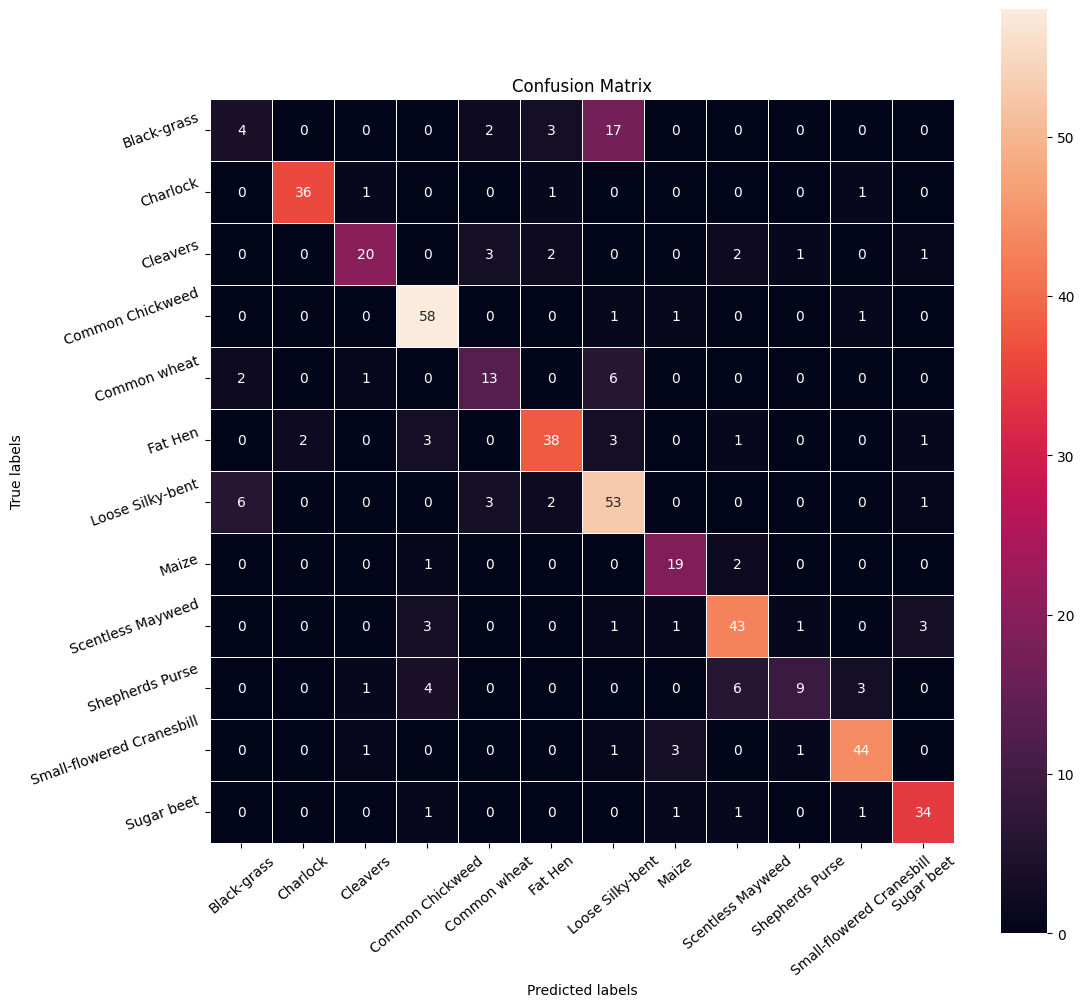

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg)

f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

**Plotting Classification Report**

In [ ]:
# Plotting the classification report
cr2=classification_report(y_test_arg,y_pred_arg)
print(cr2)

              precision    recall  f1-score   support

           0       0.33      0.15      0.21        26
           1       0.95      0.92      0.94        39
           2       0.83      0.69      0.75        29
           3       0.83      0.95      0.89        61
           4       0.62      0.59      0.60        22
           5       0.83      0.79      0.81        48
           6       0.65      0.82      0.72        65
           7       0.76      0.86      0.81        22
           8       0.78      0.83      0.80        52
           9       0.75      0.39      0.51        23
          10       0.88      0.88      0.88        50
          11       0.85      0.89      0.87        38

    accuracy                           0.78       475
   macro avg       0.75      0.73      0.73       475
weighted avg       0.77      0.78      0.77       475



In [ ]:
print(cr1)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.65      0.82      0.73        39
           2       0.80      0.55      0.65        29
           3       0.82      0.89      0.85        61
           4       1.00      0.05      0.09        22
           5       0.67      0.71      0.69        48
           6       0.56      0.94      0.70        65
           7       0.77      0.45      0.57        22
           8       0.66      0.81      0.72        52
           9       0.56      0.39      0.46        23
          10       0.87      0.78      0.82        50
          11       0.63      0.68      0.66        38

    accuracy                           0.68       475
   macro avg       0.67      0.59      0.58       475
weighted avg       0.67      0.68      0.65       475



<b>CONCLUSIONS:</b><br> We see that the overall perforance of model 2 is much better than the performance of model 1.

- We observe that most of the classes are predicted correctly.
- Class 0 (Black-grass) is mostly misclassified, but all three scores are better than of model 1.
- Class 2 (Cleavers) has a relatively low recall.
- Class 4 (Common wheat) has still low scores, but recall  f1-score are significantly better than of model 1.
- Class 6 (Loose Silky-bent) has a relatively low precision.
- Class 9 (Shepherds Purse) has low recall and f1-score, similar to model 1.

## Final Model

### Visualizing the prediction

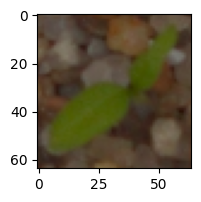

1/1 [==============================] - 0s 56ms/step
Predicted Label ['Common Chickweed']
True Label Common Chickweed


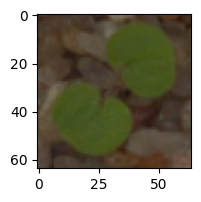

1/1 [==============================] - 0s 30ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


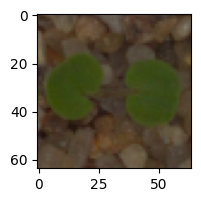

1/1 [==============================] - 0s 46ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


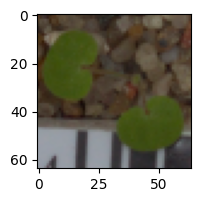

1/1 [==============================] - 0s 112ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


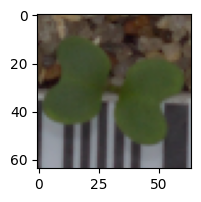

1/1 [==============================] - 0s 83ms/step
Predicted Label ['Charlock']
True Label Charlock


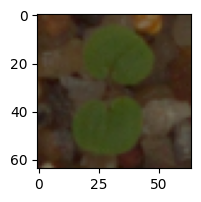

1/1 [==============================] - 0s 96ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


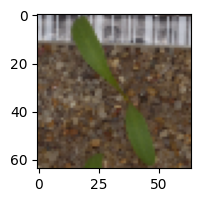

1/1 [==============================] - 0s 65ms/step
Predicted Label ['Sugar beet']
True Label Sugar beet


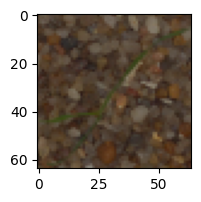

1/1 [==============================] - 0s 33ms/step
Predicted Label ['Loose Silky-bent']
True Label Loose Silky-bent


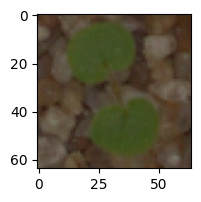

1/1 [==============================] - 0s 38ms/step
Predicted Label ['Cleavers']
True Label Small-flowered Cranesbill


In [ ]:
# Visualizing the predicted and correct label of images from test data

for i in range(0,9):
  plt.figure(figsize=(2,2))
  plt.imshow(X_test[i])
  plt.show()
  ## Here we predict the test data using the final model selected
  print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[i].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
  print('True Label', enc.inverse_transform(y_test_encoded)[i])                                               # using inverse_transform() to get the output label from the output vector


<b>CONCLUSION:</b><br> We see that only in one case out of 10 the model prediction was false ('Cleavers instead' of 'Small-flowered Cranesbill').

## Actionable Insights and Business Recommendations

### **Conclusion**

- The dataset appears to be quite imbalanced. In fact, the number of
images of the Loose Silky-bent (654) is almost three time more than the number
of images of the Maize (221).
- We can observe from the confusion matrices of both models that Model 2 was the best model because it predicted the majority of the classes better than Model 1.
- Most of the classes were predicted correctly by Model 2.
- The test accuracy of Model 2 is 78%.
- Data Augmentation has helped in improving Model 1.

However, performance of Model 2 is not good in some cases. In particular:
- Class 0 (Black-grass) is mostly misclassified in both models, but all three scores are better than of Model 1.
- Class 2 (Cleavers) has a relatively low recall in Model 2.
- Class 4 (Common wheat) has still low scores in Model 2, but recall  f1-score are significantly better than of Model 1.
- Class 6 (Loose Silky-bent) has a relatively low precision in Model 2.
- Class 9 (Shepherds Purse) has low recall and f1-score, similar to Model 1.

### **Scope of Improvement**

- Model 1 and Model 2 can be further improved by training with different filter sizes and different number of filters.
- These models can also be trained on the original image_size i.e 128 x 128 rather than being reduced to 64.
- Data Augmentation can be performed more and dropout_rate can be changed to improve the model performance.
- Other Transfer Learning architectures can also be used to train the CNN model and these models can be used for classification.